# Preparación y Entendimiento de Datos (Wrangling & EDA)

In [2]:
!ls

sample_data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url_cruda_precipitation = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/precipitation.csv'

print(f"Inicio Paso 1: Carga de datos desde: {url_cruda_precipitation}")

try:
    df_crudo = pd.read_csv(url_cruda_precipitation)

    print("Exito! Data cruda recibida. Muestra:")
    print(df_crudo.iloc[:5, :5])

except Exception as e:
    print(f"ERROR en Paso 1")
    print(f"No se pudo cargar la data. Error: {e}")

Inicio Paso 1: Carga de datos desde: https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/precipitation.csv
Exito! Data cruda recibida. Muestra:
  metadata/apiVersion metadata/status  metadata/messages  \
0                  v1         success                NaN   

   data/cdd/DOM/1950-01  data/cdd/DOM/1950-02  
0                 11.95                 13.12  


In [5]:
print("Inicio Paso 2: Analisis Estructural")

# Dimensiones (filas, columnas)
print("Dimensiones de la Data Cruda:")
print(f"Filas: {df_crudo.shape[0]}")
print(f"Columnas: {df_crudo.shape[1]}")

# Nombres de las primeras 10 columnas
print("Nombres de Columna (10 primeros):")
print(list(df_crudo.columns[:10]))

# Resumen tecnico
print("Resumen Tecnico (info):")
df_crudo.info()

Inicio Paso 2: Analisis Estructural
Dimensiones de la Data Cruda:
Filas: 1
Columnas: 2667
Nombres de Columna (10 primeros):
['metadata/apiVersion', 'metadata/status', 'metadata/messages', 'data/cdd/DOM/1950-01', 'data/cdd/DOM/1950-02', 'data/cdd/DOM/1950-03', 'data/cdd/DOM/1950-04', 'data/cdd/DOM/1950-05', 'data/cdd/DOM/1950-06', 'data/cdd/DOM/1950-07']
Resumen Tecnico (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2667 entries, metadata/apiVersion to data/rx5day/DOM/2023-12
dtypes: float64(2632), int64(33), object(2)
memory usage: 21.0+ KB


In [6]:
print("Inicio Paso 3: Limpieza y Transformacion")

# Eliminar las columnas de metadatos
columnas_metadatos = ['metadata/apiVersion', 'metadata/status', 'metadata/messages']
df_sin_metadata = df_crudo.drop(columns=columnas_metadatos)

# Transformar TODAS las columnas a formato largo
df_largo_completo = df_sin_metadata.melt(var_name='variable_fecha', value_name='valor')

# Dividir la columna 'variable_fecha'
partes = df_largo_completo['variable_fecha'].str.split('/', expand=True)
df_largo_completo['variable'] = partes[1]
df_largo_completo['fecha'] = partes[3]

# Seleccionar las columnas finales
df_precipitacion_procesado = df_largo_completo[['fecha', 'variable', 'valor']]

# Mostrar una muestra
print("Exito! Data procesada. Muestra visual:")
print(df_precipitacion_procesado.head())

print("Variables procesadas:")
print(df_precipitacion_procesado['variable'].unique())

Inicio Paso 3: Limpieza y Transformacion
Exito! Data procesada. Muestra visual:
     fecha variable  valor
0  1950-01      cdd  11.95
1  1950-02      cdd  13.12
2  1950-03      cdd  16.75
3  1950-04      cdd   9.39
4  1950-05      cdd   5.99
Variables procesadas:
['cdd' 'pr' 'rx5day']


In [7]:
df_crudo = pd.read_csv(url_cruda_precipitation)

# Columnas de datos
columnas_de_datos = df_crudo.columns[3:]

# Encontrar los prefijos de variables unicos (la 2da parte)
variables_encontradas = set(col.split('/')[1] for col in columnas_de_datos)

print("Las variables encontradas en el archivo son:")
print(variables_encontradas)

Las variables encontradas en el archivo son:
{'pr', 'cdd', 'rx5day'}


In [8]:
print("Inicio Paso 4: Procesamiento de Fechas")

# Copiar el dataframe
df_final_precipitacion = df_precipitacion_procesado.copy()

# Convertir 'fecha' a objeto datetime
df_final_precipitacion['fecha'] = pd.to_datetime(df_final_precipitacion['fecha'], format='%Y-%m')

# Establecer 'fecha' como el indice
df_final_precipitacion = df_final_precipitacion.set_index('fecha')

# Mostrar el resultado
print("Exito! DataFrame final con indice de tiempo. Muestra visual:")
print(df_final_precipitacion.head())

print("Resumen tecnico final (info):")
df_final_precipitacion.info()

Inicio Paso 4: Procesamiento de Fechas
Exito! DataFrame final con indice de tiempo. Muestra visual:
           variable  valor
fecha                     
1950-01-01      cdd  11.95
1950-02-01      cdd  13.12
1950-03-01      cdd  16.75
1950-04-01      cdd   9.39
1950-05-01      cdd   5.99
Resumen tecnico final (info):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2664 entries, 1950-01-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  2664 non-null   object 
 1   valor     2664 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.4+ KB


In [9]:
print("Inicio EDA: Reestructuracion y Estadisticas")

# Pivotar el DataFrame (variable por columna)
df_eda_precipitacion = df_final_precipitacion.pivot_table(index='fecha', columns='variable', values='valor')

# Muestra del nuevo DataFrame
print("Muestra del DataFrame EDA:")
print(df_eda_precipitacion.head())

# Estadisticas descriptivas
print("Estadisticas Descriptivas:")
print(df_eda_precipitacion.describe())

Inicio EDA: Reestructuracion y Estadisticas
Muestra del DataFrame EDA:
variable      cdd      pr  rx5day
fecha                            
1950-01-01  11.95   52.34   15.19
1950-02-01  13.12   60.15   32.48
1950-03-01  16.75   23.55   13.75
1950-04-01   9.39   87.36   39.60
1950-05-01   5.99  149.57   66.53
Estadisticas Descriptivas:
variable         cdd          pr      rx5day
count     888.000000  888.000000  888.000000
mean        7.381926   90.834606   40.430383
std         3.840405   51.874584   24.124669
min         1.060000   14.590000    6.800000
25%         4.367500   51.745000   23.810000
50%         6.195000   83.280000   35.430000
75%         9.792500  117.880000   51.562500
max        21.530000  324.770000  170.620000


In [10]:
display(df_eda_precipitacion)

variable,cdd,pr,rx5day
fecha,,,
1950-01-01,11.95,52.34,15.19
1950-02-01,13.12,60.15,32.48
1950-03-01,16.75,23.55,13.75
1950-04-01,9.39,87.36,39.60
1950-05-01,5.99,149.57,66.53
...,...,...,...
2023-08-01,4.33,209.48,115.70
2023-09-01,4.15,85.84,31.05
2023-10-01,5.39,112.72,43.49


Inicio EDA: Visualizacion de Series de Tiempo
Grafico 'eda_series_de_tiempo.png' generado.


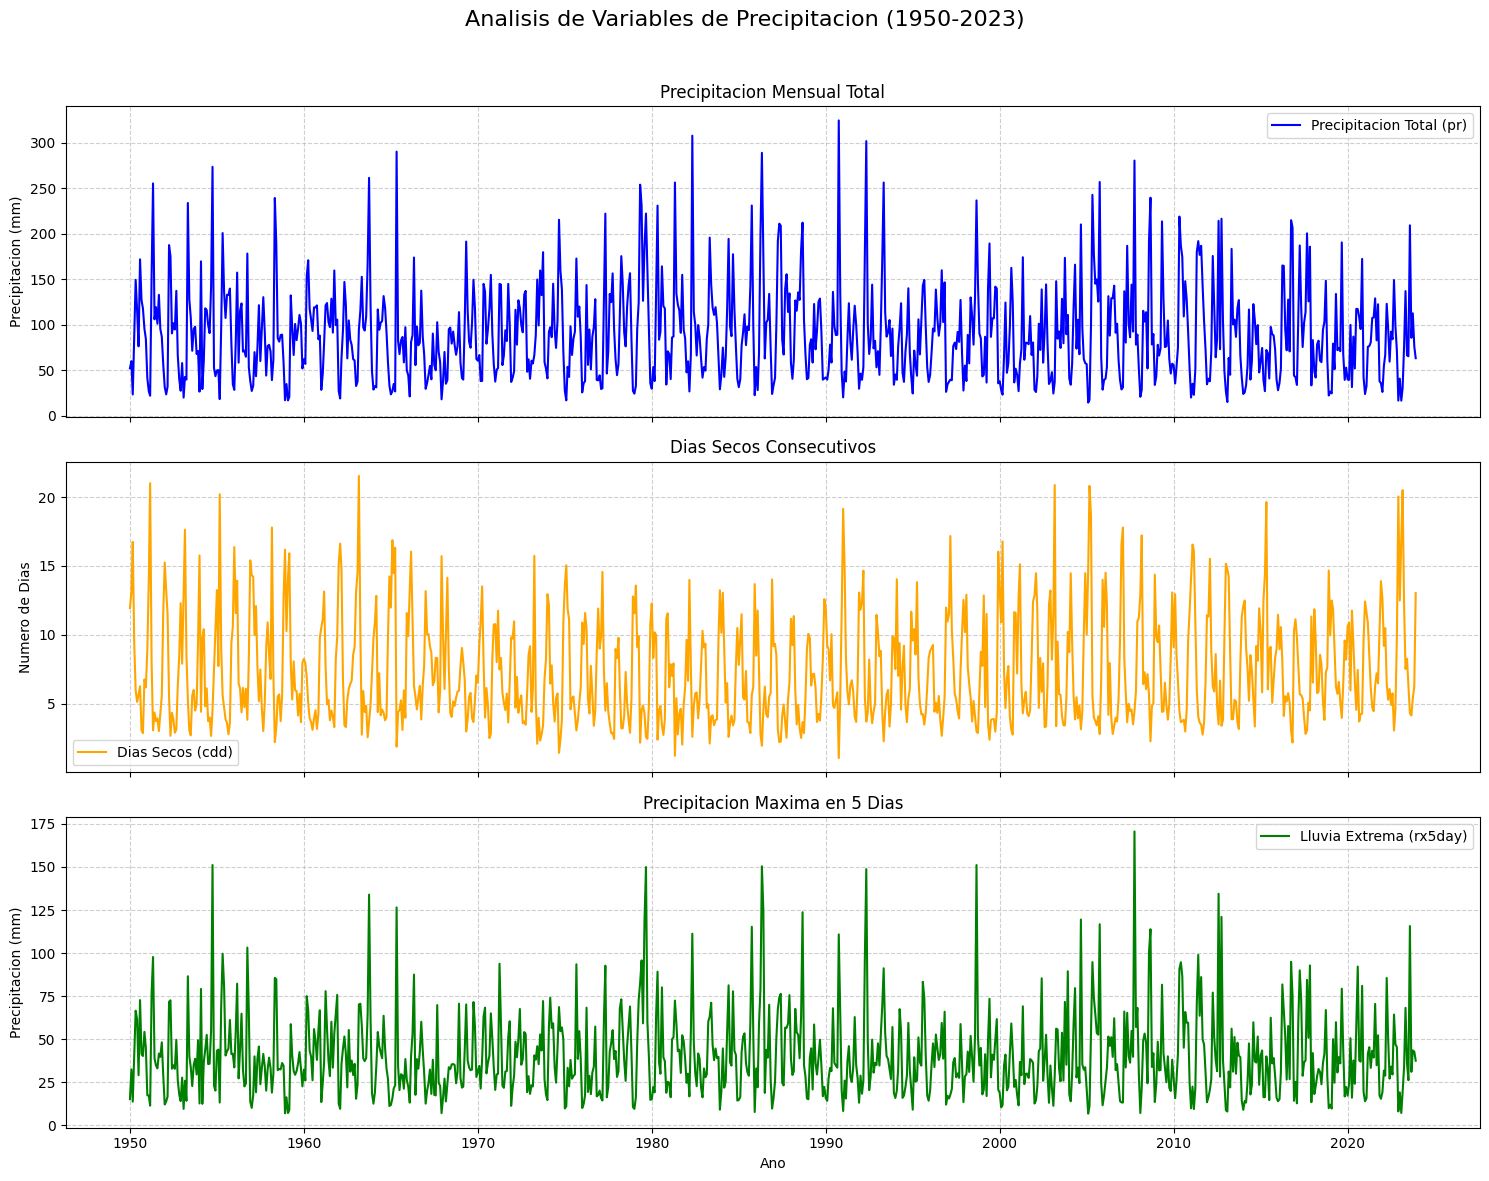

In [11]:
import matplotlib.pyplot as plt

print("Inicio EDA: Visualizacion de Series de Tiempo")

# Crear figura con 3 subplots verticales.
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Analisis de Variables de Precipitacion (1950-2023)', fontsize=16)

# Grafico de Precipitacion Total (pr)
axes[0].plot(df_eda_precipitacion.index, df_eda_precipitacion['pr'], color='blue', label='Precipitacion Total (pr)')
axes[0].set_ylabel('Precipitacion (mm)')
axes[0].set_title('Precipitacion Mensual Total')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Grafico de Dias Secos Consecutivos (cdd)
axes[1].plot(df_eda_precipitacion.index, df_eda_precipitacion['cdd'], color='orange', label='Dias Secos (cdd)')
axes[1].set_ylabel('Numero de Dias')
axes[1].set_title('Dias Secos Consecutivos')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Grafico de Precipitacion Maxima en 5 Dias (rx5day)
axes[2].plot(df_eda_precipitacion.index, df_eda_precipitacion['rx5day'], color='green', label='Lluvia Extrema (rx5day)')
axes[2].set_ylabel('Precipitacion (mm)')
axes[2].set_title('Precipitacion Maxima en 5 Dias')
axes[2].set_xlabel('Ano')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

# Ajustar y guardar la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_series_de_tiempo.png')

print("Grafico 'eda_series_de_tiempo.png' generado.")

In [12]:
url_cruda_temperatura = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/temperatura.csv'

print(f"Intentando extraer datos crudos desde:\n{url_cruda_temperatura}\n")

try:
    df_crudo_temp = pd.read_csv(url_cruda_temperatura)

    print("bien")
    print(df_crudo_temp.iloc[:5, :5])

except Exception as e:
    print(f"No se pudo extraer la data. El error fue: {e}")

Intentando extraer datos crudos desde:
https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/temperatura.csv

bien
  metadata/apiVersion metadata/status  metadata/messages  \
0                  v1         success                NaN   

   data/tas/DOM/1950-01  data/tas/DOM/1950-02  
0                 20.69                    21  


In [13]:
# Analisis Estructural df_crudo_temp

print("Dimension del dataset")
print(df_crudo_temp.shape)

print("\nInformacion de las columnas")
print(df_crudo_temp.info())

print("\nNombres de las primeras 10 columnas")
print(df_crudo_temp.columns[:10])

Dimension del dataset
(1, 2667)

Informacion de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2667 entries, metadata/apiVersion to data/tasmin/DOM/2023-12
dtypes: float64(2630), int64(35), object(2)
memory usage: 21.0+ KB
None

Nombres de las primeras 10 columnas
Index(['metadata/apiVersion', 'metadata/status', 'metadata/messages',
       'data/tas/DOM/1950-01', 'data/tas/DOM/1950-02', 'data/tas/DOM/1950-03',
       'data/tas/DOM/1950-04', 'data/tas/DOM/1950-05', 'data/tas/DOM/1950-06',
       'data/tas/DOM/1950-07'],
      dtype='object')


In [14]:
# Ignorar las primeras columnas de metadatos
columnas_de_datos = df_crudo_temp.columns[3:]

# Extraer la segunda parte de cada nombre de columna
# Se usa un set para obtener solo los valores unicos
variables_encontradas = set([col.split('/')[1] for col in columnas_de_datos])

print("Variables unicas encontradas en el archivo:")
print(list(variables_encontradas))

Variables unicas encontradas en el archivo:
['tas', 'tasmax', 'tasmin']


In [15]:
# Limpieza y Transformacion de Datos de Temperatura

print("Iniciando limpieza y transformacion de df_crudo_temp")

# 1. Quitar metadatos
columnas_a_eliminar_temp = ['metadata/apiVersion', 'metadata/status', 'metadata/messages']
df_sin_metadata_temp = df_crudo_temp.drop(columns=columnas_a_eliminar_temp)

# 2. Transformar de ancho a largo (Unpivot)
df_largo_temp = df_sin_metadata_temp.melt(var_name='variable_fecha', value_name='valor')

# 3. Extraer variable y fecha
partes_temp = df_largo_temp['variable_fecha'].str.split('/', expand=True)
df_largo_temp['variable'] = partes_temp[1]
df_largo_temp['fecha'] = partes_temp[3]

# 4. Limpiar y seleccionar columnas
df_final_temperatura = df_largo_temp[['fecha', 'variable', 'valor']].copy()
df_final_temperatura['fecha'] = pd.to_datetime(df_final_temperatura['fecha'], format='%Y-%m')

# 5. Pivotar para crear el DataFrame final de EDA
df_eda_temperatura = df_final_temperatura.pivot_table(index='fecha', columns='variable', values='valor')

print("\nProceso completado.")
print("Mostrando el DataFrame de temperatura limpio y estructurado:")
display(df_eda_temperatura)

Iniciando limpieza y transformacion de df_crudo_temp

Proceso completado.
Mostrando el DataFrame de temperatura limpio y estructurado:


variable,tas,tasmax,tasmin
fecha,,,
1950-01-01,20.69,24.90,17.61
1950-02-01,21.00,25.30,17.71
1950-03-01,22.35,26.95,18.77
1950-04-01,22.46,26.53,19.30
1950-05-01,23.39,27.38,20.16
...,...,...,...
2023-08-01,26.71,30.91,23.81
2023-09-01,26.73,30.97,23.64
2023-10-01,26.27,30.33,23.34


In [16]:
print("Dimensiones del DataFrame df_eda_temperatura:")
print(df_eda_temperatura.shape)

print("\nResumen técnico del DataFrame df_eda_temperatura:")
df_eda_temperatura.info()

Dimensiones del DataFrame df_eda_temperatura:
(888, 3)

Resumen técnico del DataFrame df_eda_temperatura:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 1950-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tas     888 non-null    float64
 1   tasmax  888 non-null    float64
 2   tasmin  888 non-null    float64
dtypes: float64(3)
memory usage: 27.8 KB


In [17]:
print("Estadisticas Descriptivas de las Variables de Temperatura:")
display(df_eda_temperatura.describe())

Estadisticas Descriptivas de las Variables de Temperatura:


variable,tas,tasmax,tasmin
count,888.000000,888.000000,888.000000
mean,23.883953,27.962872,20.615236
std,1.320840,1.338750,1.400775
min,20.470000,24.340000,16.440000
25%,22.797500,26.907500,19.440000
50%,24.030000,27.995000,20.900000
75%,24.990000,29.020000,21.732500
max,26.970000,31.260000,23.830000


Generando grafico de las series de tiempo de temperatura...


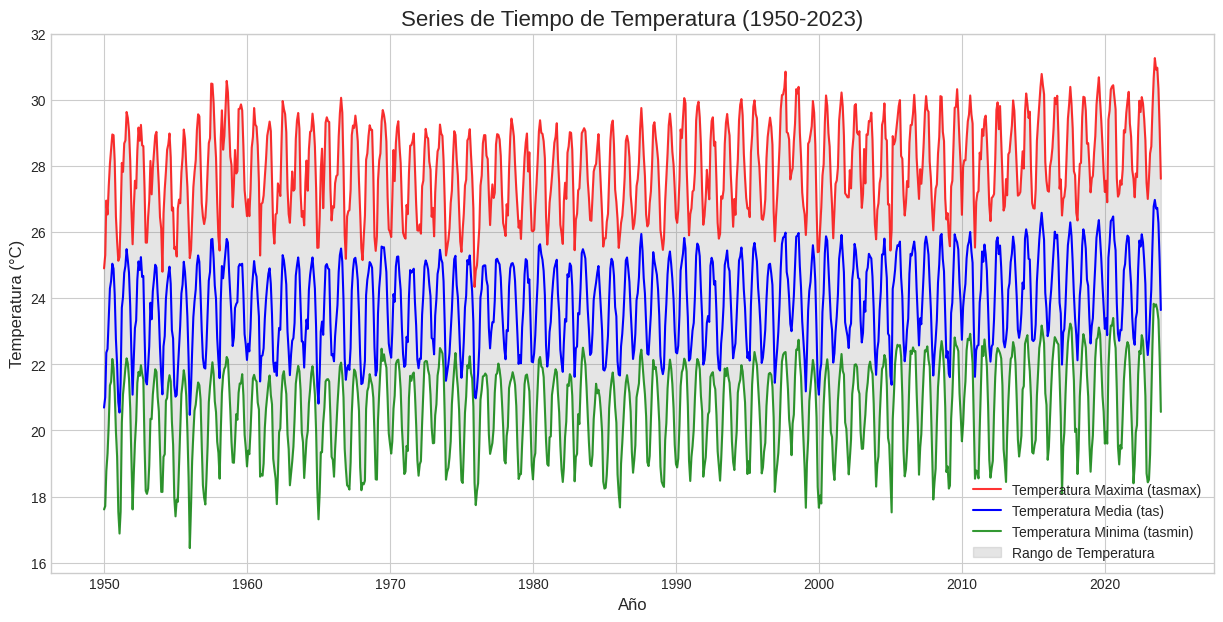

In [18]:
# Visualizacion de Series de Tiempo de Temperatura ---

import matplotlib.pyplot as plt

print("Generando grafico de las series de tiempo de temperatura...")

# Preparar la figura para el grafico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

# Graficar cada variable de temperatura
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tasmax'], label='Temperatura Maxima (tasmax)', color='red', alpha=0.8)
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tas'], label='Temperatura Media (tas)', color='blue')
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tasmin'], label='Temperatura Minima (tasmin)', color='green', alpha=0.8)

# Rellenar el area entre max y min para visualizacion
ax.fill_between(df_eda_temperatura.index, df_eda_temperatura['tasmin'], df_eda_temperatura['tasmax'], color='gray', alpha=0.2, label='Rango de Temperatura')

# Anadir titulos y etiquetas
ax.set_title('Series de Tiempo de Temperatura (1950-2023)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.legend()

# Mostrar el grafico
plt.show()

In [19]:
#  Calculo de Promedios Anuales de Temperatura

# Agrupar por ano y calcular la media para cada variable
df_anual_temp = df_eda_temperatura.resample('YE').mean()

print("Calculo de promedios anuales completado.")
print("Mostrando los promedios anuales de temperatura:")
display(df_anual_temp.head())

Calculo de promedios anuales completado.
Mostrando los promedios anuales de temperatura:


variable,tas,tasmax,tasmin
fecha,,,
1950-12-31,23.126667,27.154167,20.060000
1951-12-31,23.489167,27.763333,20.185000
1952-12-31,23.598333,27.758333,20.335833
1953-12-31,23.501667,27.559167,20.257500
1954-12-31,23.148333,27.154167,19.917500


Generando grafico de la tendencia anual de temperatura...


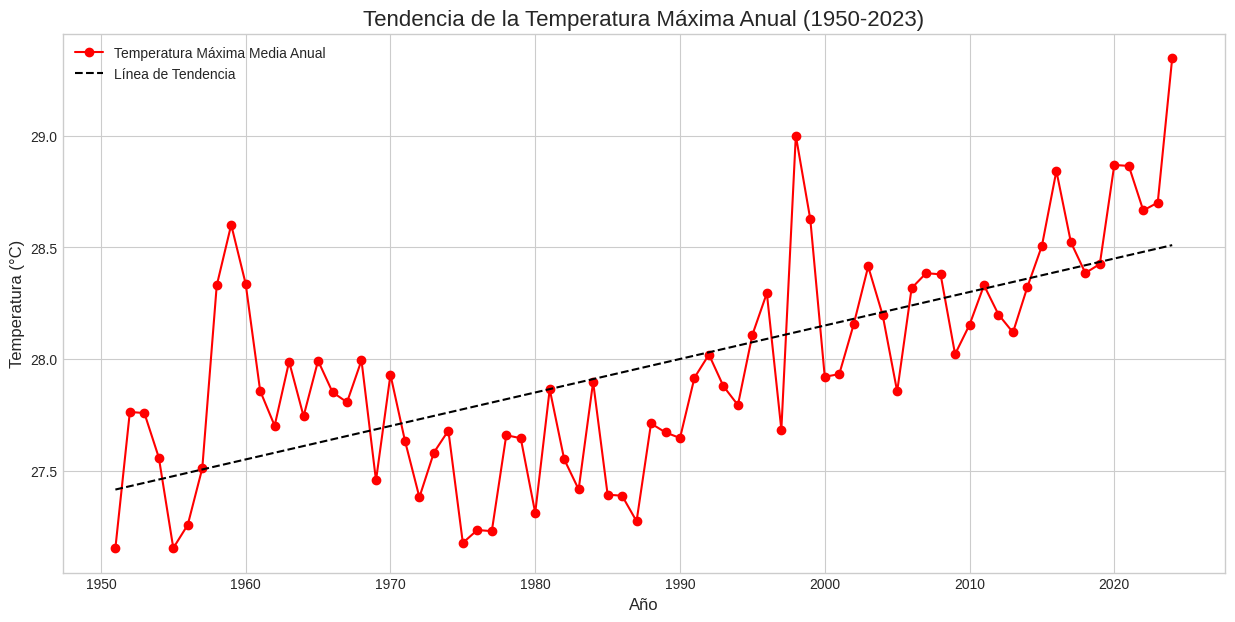

In [20]:
#  Visualizacion de la Tendencia Anual de Temperatura

import matplotlib.pyplot as plt
import numpy as np

print("Generando grafico de la tendencia anual de temperatura...")

# Preparar la figura para el grafico
fig, ax = plt.subplots(figsize=(15, 7))

# Graficar la serie de tiempo de la temperatura maxima anual
ax.plot(df_anual_temp.index, df_anual_temp['tasmax'], label='Temperatura Máxima Media Anual', color='red', marker='o', linestyle='-')

# Calcular y graficar la linea de tendencia (regresion lineal)
x = np.arange(len(df_anual_temp.index))
y = df_anual_temp['tasmax']
m, b = np.polyfit(x, y, 1)
ax.plot(df_anual_temp.index, m*x + b, label='Línea de Tendencia', color='black', linestyle='--')

# Anadir titulos y etiquetas
ax.set_title('Tendencia de la Temperatura Máxima Anual (1950-2023)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.legend()
ax.grid(True)

# Mostrar el grafico
plt.show()

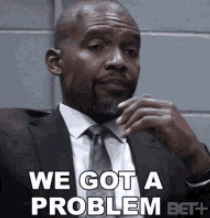

In [21]:
#Fase 3: Integracion de Datos Climaticos

print("Uniendo los DataFrames de precipitacion y temperatura...")

# Unir los dos DataFrames limpios usando su indice de fecha comun
df_climatico = df_eda_precipitacion.join(df_eda_temperatura)

print("\nIntegracion completada.")
print("Mostrando una muestra del DataFrame climatico unificado:")

# Mostrar las primeras filas para verificar la union
display(df_climatico.head())

# Verificar la estructura del nuevo DataFrame
print("\nVerificando la estructura final del DataFrame unificado:")
df_climatico.info()

Uniendo los DataFrames de precipitacion y temperatura...

Integracion completada.
Mostrando una muestra del DataFrame climatico unificado:


variable,cdd,pr,rx5day,tas,tasmax,tasmin
fecha,,,,,,
1950-01-01,11.95,52.34,15.19,20.69,24.90,17.61
1950-02-01,13.12,60.15,32.48,21.00,25.30,17.71
1950-03-01,16.75,23.55,13.75,22.35,26.95,18.77
1950-04-01,9.39,87.36,39.60,22.46,26.53,19.30
1950-05-01,5.99,149.57,66.53,23.39,27.38,20.16



Verificando la estructura final del DataFrame unificado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 1950-01-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cdd     888 non-null    float64
 1   pr      888 non-null    float64
 2   rx5day  888 non-null    float64
 3   tas     888 non-null    float64
 4   tasmax  888 non-null    float64
 5   tasmin  888 non-null    float64
dtypes: float64(6)
memory usage: 48.6 KB


In [22]:
#Guardar el DataFrame Unificado

# Nombre del archivo de salida
nombre_archivo_salida = 'datos_climaticos_unificados.csv'

# Guardar df_climatico a un archivo CSV
df_climatico.to_csv(nombre_archivo_salida)

print(f"DataFrame unificado guardado exitosamente como '{nombre_archivo_salida}'")

DataFrame unificado guardado exitosamente como 'datos_climaticos_unificados.csv'


In [23]:
#  EDA del DataFrame Unificado desde GitHub
import time
import pandas as pd

# URL del archivo CSV en formato raw
url_unificado = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/cleandata/datos_climaticos_unificados.csv'

print(f"Cargando dataset unificado desde GitHub:\n{url_unificado}\n")

try:
    # Cargar el dataset
    df_climatico_git = pd.read_csv(url_unificado)

    #  Paso 1: Analisis Estructural
    print("Carga exitosa. Realizando analisis estructural...")

    print("\nForma del DataFrame (filas, columnas):")
    print(df_climatico_git.shape)

    print("\nInformacion general y tipos de datos:")
    # Es importante verificar que 'fecha' sea reconocida como datetime
    df_climatico_git.info()

    #print("\nMostrando las primeras 5 filas:")
    display(df_climatico_git.head())



except Exception as e:
    print(f"No se pudo cargar la data. El error fue: {e}")

Cargando dataset unificado desde GitHub:
https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/cleandata/datos_climaticos_unificados.csv

Carga exitosa. Realizando analisis estructural...

Forma del DataFrame (filas, columnas):
(888, 7)

Informacion general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   888 non-null    object 
 1   cdd     888 non-null    float64
 2   pr      888 non-null    float64
 3   rx5day  888 non-null    float64
 4   tas     888 non-null    float64
 5   tasmax  888 non-null    float64
 6   tasmin  888 non-null    float64
dtypes: float64(6), object(1)
memory usage: 48.7+ KB


,fecha,cdd,pr,rx5day,tas,tasmax,tasmin
0,1950-01-01,11.95,52.34,15.19,20.69,24.90,17.61
1,1950-02-01,13.12,60.15,32.48,21.00,25.30,17.71
2,1950-03-01,16.75,23.55,13.75,22.35,26.95,18.77
3,1950-04-01,9.39,87.36,39.60,22.46,26.53,19.30
4,1950-05-01,5.99,149.57,66.53,23.39,27.38,20.16


In [24]:
# Correccion: Restaurar el DatetimeIndex

print("La columna 'fecha' fue cargada como texto (object).")
print("Convirtiendo a formato datetime y estableciendo como indice...")

# Convertir la columna 'fecha' a tipo datetime
df_climatico_git['fecha'] = pd.to_datetime(df_climatico_git['fecha'])

# Establecer la columna 'fecha' como el indice del DataFrame
df_climatico_git.set_index('fecha', inplace=True)

print("\nCorreccion aplicada. Verificando la nueva estructura:")
df_climatico_git.info()

La columna 'fecha' fue cargada como texto (object).
Convirtiendo a formato datetime y estableciendo como indice...

Correccion aplicada. Verificando la nueva estructura:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 1950-01-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cdd     888 non-null    float64
 1   pr      888 non-null    float64
 2   rx5day  888 non-null    float64
 3   tas     888 non-null    float64
 4   tasmax  888 non-null    float64
 5   tasmin  888 non-null    float64
dtypes: float64(6)
memory usage: 48.6 KB


In [25]:
print("Calculando estadisticas descriptivas para el DataFrame unificado:")

display(df_climatico_git.describe())

Calculando estadisticas descriptivas para el DataFrame unificado:


,cdd,pr,rx5day,tas,tasmax,tasmin
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,7.381926,90.834606,40.430383,23.883953,27.962872,20.615236
std,3.840405,51.874584,24.124669,1.320840,1.338750,1.400775
min,1.060000,14.590000,6.800000,20.470000,24.340000,16.440000
25%,4.367500,51.745000,23.810000,22.797500,26.907500,19.440000
50%,6.195000,83.280000,35.430000,24.030000,27.995000,20.900000
75%,9.792500,117.880000,51.562500,24.990000,29.020000,21.732500
max,21.530000,324.770000,170.620000,26.970000,31.260000,23.830000


Calculando la matriz de correlacion del DataFrame unificado...


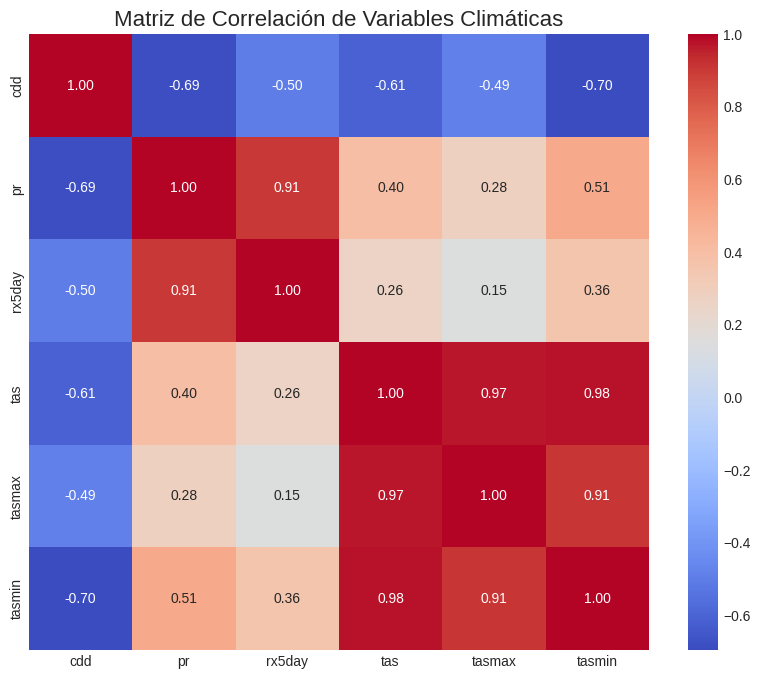

In [26]:
# Analisis de Correlacion

import seaborn as sns
import matplotlib.pyplot as plt

print("Calculando la matriz de correlacion del DataFrame unificado...")

# Calculate the correlation matrix
matriz_correlacion = df_climatico_git.corr()

# Prepare the figure for the heatmap
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Matriz de Correlación de Variables Climáticas', fontsize=16)

# Show the plot
plt.show()


#Analisis de Datos Hidrologicos Reales

In [27]:
# Analisis de Datos Hidrologicos Reales
# Paso 1: Carga y Analisis Estructural desde GitHub

import pandas as pd

# as URLs para apuntar a la version "raw" del archivo
url_hidro = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/rawdata/GRDC-Monthly.csv'
url_estaciones = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/rawdata/stationbasins.csv'

print(f"Cargando datos hidrologicos desde GitHub:\n{url_hidro}\n")
print(f"Cargando metadatos de estaciones desde GitHub:\n{url_estaciones}\n")

try:
    # Cargar los dos datasets
    df_hidro_crudo = pd.read_csv(url_hidro)
    df_estaciones = pd.read_csv(url_estaciones)

    print("--- Analisis Estructural de Datos de Caudal (GRDC-Monthly.csv) ---")
    print("\nForma del DataFrame (filas, columnas):")
    print(df_hidro_crudo.shape)
    print("\nInformacion general:")
    df_hidro_crudo.info()
    print("\nMostrando las primeras 5 filas:")
    display(df_hidro_crudo.head())

    print("\n\n--- Analisis Estructural de Metadatos de Estaciones (stationbasins.csv) ---")
    print("\nForma del DataFrame (filas, columnas):")
    print(df_estaciones.shape)
    print("\nInformacion general:")
    df_estaciones.info()
    print("\nMostrando las primeras 5 filas:")
    display(df_estaciones.head())

except Exception as e:
    print(f"No se pudo cargar la data. El error fue: {e}")

Cargando datos hidrologicos desde GitHub:
https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/rawdata/GRDC-Monthly.csv

Cargando metadatos de estaciones desde GitHub:
https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/rawdata/stationbasins.csv

--- Analisis Estructural de Datos de Caudal (GRDC-Monthly.csv) ---

Forma del DataFrame (filas, columnas):
(432, 13)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 432 non-null    object 
 1   id                   432 non-null    int64  
 2   runoff_mean          347 non-null    float64
 3   flag                 0 non-null      float64
 4   area                 432 non-null    int64  
 5   country              432 non-null    object 
 6   geo_x                432 non-null    float64
 7   geo_y                432 non-

,time,id,runoff_mean,flag,area,country,geo_x,geo_y,geo_z,owneroforiginaldata,river_name,station_name,timezone
0,1/1/1976,4382100,37.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4
1,1/1/1976,4382200,13.0,NaN,1709,DO,-71.07,18.68,300,Initial dataset collected in the framework of ...,RIO YAQUE DEL SUR,EL PUENTE,4
2,1/1/1976,4382300,1.0,NaN,116,DO,-71.20,18.02,422,Initial dataset collected in the framework of ...,RIO NIZAITO,VILLA NIZAO,4
3,1/1/1976,4382700,67.0,NaN,5115,DO,-69.82,19.15,8,Initial dataset collected in the framework of ...,RIO YUNA,ELLIMON,4
4,2/1/1976,4382100,27.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4




--- Analisis Estructural de Metadatos de Estaciones (stationbasins.csv) ---

Forma del DataFrame (filas, columnas):
(4, 17)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          4 non-null      float64
 1   Y          4 non-null      float64
 2   grdc_no    4 non-null      int64  
 3   river      4 non-null      object 
 4   station    4 non-null      object 
 5   area       4 non-null      int64  
 6   altitude   4 non-null      int64  
 7   lat_org    4 non-null      float64
 8   long_org   4 non-null      float64
 9   lat_pp     4 non-null      float64
 10  long_pp    4 non-null      float64
 11  dist_km    4 non-null      float64
 12  area_calc  4 non-null      float64
 13  quality    4 non-null      object 
 14  type       4 non-null      object 
 15  comment    4 non-null      object 
 16  source     4 non-null     

,X,Y,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,area_calc,quality,type,comment,source
0,-71.13210,19.382100,4382100,RIO YAQUE DEL NORTE,PALO VERDE,6718,11,19.77,-71.55,19.764170,-71.562500,1.5,6713.30,High,Automatic,Area difference <= 5% and distance <= 5 km,merit
1,-70.85085,18.849151,4382200,RIO YAQUE DEL SUR,EL PUENTE,1709,300,18.68,-71.07,18.678330,-71.065000,0.6,1676.70,High,Automatic,Area difference <= 5% and distance <= 5 km,merit
2,-71.25000,18.087500,4382300,RIO NIZAITO,VILLA NIZAO,116,422,18.02,-71.20,18.028333,-71.198333,0.9,126.02,Medium,Automatic,Area difference 5-10% and distance <= 5 km,merit
3,-70.32710,19.131700,4382700,RIO YUNA,ELLIMON,5115,8,19.15,-69.82,19.153330,-69.819170,0.4,5141.90,High,Automatic,Area difference <= 5% and distance <= 5 km,merit


In [28]:
# Identificar la informacion de la estacion para el RIO YAQUE DEL NORTE
estacion_yaque = df_estaciones[df_estaciones['river'] == 'RIO YAQUE DEL NORTE']

if not estacion_yaque.empty:
    # Obtener el ID (grdc_no) de la estacion
    id_yaque = estacion_yaque['grdc_no'].iloc[0]
    print(f"Estacion encontrada: RIO YAQUE DEL NORTE")
    print(f"ID (grdc_no): {id_yaque}")

    # Filtrar el DataFrame de caudal para quedarnos solo con los datos de esa estacion
    df_yaque_real = df_hidro_crudo[df_hidro_crudo['id'] == id_yaque].copy()

    print(f"\nSe encontraron {len(df_yaque_real)} registros para esta estacion.")
    print("Mostrando una muestra de los datos filtrados:")
    display(df_yaque_real.head())

else:
    print("No se encontraron datos para 'RIO YAQUE DEL NORTE' en el archivo de estaciones.")


Estacion encontrada: RIO YAQUE DEL NORTE
ID (grdc_no): 4382100

Se encontraron 108 registros para esta estacion.
Mostrando una muestra de los datos filtrados:


,time,id,runoff_mean,flag,area,country,geo_x,geo_y,geo_z,owneroforiginaldata,river_name,station_name,timezone
0,1/1/1976,4382100,37.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4
4,2/1/1976,4382100,27.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4
8,3/1/1976,4382100,23.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4
12,4/1/1976,4382100,37.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4
16,5/1/1976,4382100,32.0,NaN,6718,DO,-71.55,19.77,11,Initial dataset collected in the framework of ...,RIO YAQUE DEL NORTE,PALO VERDE,4


In [29]:
print("Preparando el DataFrame 'df_yaque_real' para el analisis...")

# 1. Seleccionar solo las columnas esenciales
columnas_esenciales = ['time', 'runoff_mean']
df_yaque_limpio = df_yaque_real[columnas_esenciales].copy()

# 2. Renombrar columnas para mayor claridad
df_yaque_limpio.rename(columns={'time': 'fecha', 'runoff_mean': 'caudal_real'}, inplace=True)

# 3. Convertir la columna 'fecha' a formato datetime
# El formato de fecha es '1/1/1976'
df_yaque_limpio['fecha'] = pd.to_datetime(df_yaque_limpio['fecha'])

# 4. Establecer la columna 'fecha' como el indice
df_yaque_limpio.set_index('fecha', inplace=True)

print("\nLimpieza y preparacion completadas.")
print("Mostrando el DataFrame final del caudal real:")

display(df_yaque_limpio.head())

print("\nVerificando la nueva estructura:")
df_yaque_limpio.info()

Preparando el DataFrame 'df_yaque_real' para el analisis...

Limpieza y preparacion completadas.
Mostrando el DataFrame final del caudal real:


,caudal_real
fecha,
1976-01-01,37.0
1976-02-01,27.0
1976-03-01,23.0
1976-04-01,37.0
1976-05-01,32.0



Verificando la nueva estructura:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1976-01-01 to 1984-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   caudal_real  48 non-null     float64
dtypes: float64(1)
memory usage: 1.7 KB


In [30]:
print("Calculando estadísticas descriptivas para el caudal real del Río Yaque del Norte:")

display(df_yaque_limpio.describe())

Calculando estadísticas descriptivas para el caudal real del Río Yaque del Norte:


,caudal_real
count,48.000000
mean,64.270833
std,69.137156
min,0.000000
25%,18.250000
50%,38.000000
75%,82.000000
max,286.000000


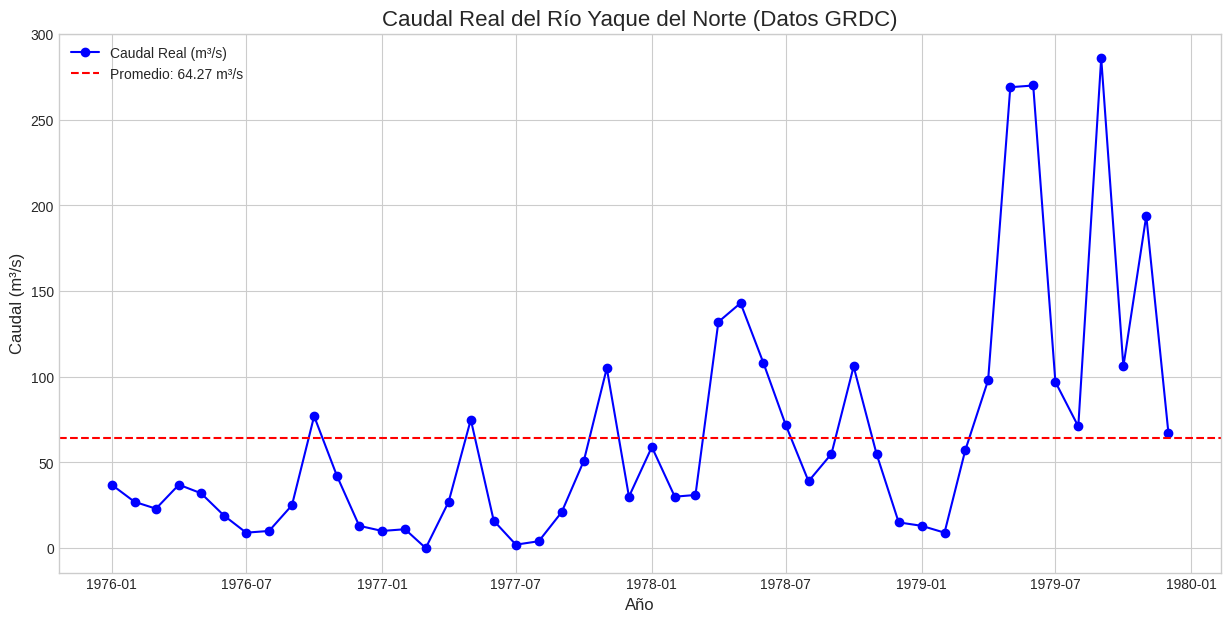

In [31]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df_yaque_limpio.index, df_yaque_limpio['caudal_real'], label='Caudal Real (m³/s)', color='blue', marker='o', linestyle='-')

caudal_promedio = df_yaque_limpio['caudal_real'].mean()
ax.axhline(y=caudal_promedio, color='red', linestyle='--', label=f'Promedio: {caudal_promedio:.2f} m³/s')

ax.set_title('Caudal Real del Río Yaque del Norte (Datos GRDC)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Caudal (m³/s)', fontsize=12)
ax.legend()
ax.grid(True)
plt.show()

In [32]:
!pip install folium -q

import folium

print("Creando el mapa interactivo de estaciones hidrológicas...")

# Coordenadas aproximadas del centro de la Republica Dominicana
coords_rd = [18.7357, -70.1627]

# Crear un mapa base centrado en RD
mapa_estaciones = folium.Map(location=coords_rd, zoom_start=8)

# Iterar sobre cada fila del DataFrame de estaciones para añadir un marcador
for index, estacion in df_estaciones.iterrows():

    popup_text = f"""
    <b>Río:</b> {estacion['river']}<br>
    <b>Estación:</b> {estacion['station']}<br>
    <b>ID:</b> {estacion['grdc_no']}
    """

    # Añadir un marcador al mapa
    folium.Marker(
        location=[estacion['Y'], estacion['X']], # Usar las coordenadas del DataFrame
        popup=popup_text,
        tooltip=estacion['river']
    ).add_to(mapa_estaciones)

print("\nMapa generado:")

# Mostrar el mapa en el cuaderno
display(mapa_estaciones)

Creando el mapa interactivo de estaciones hidrológicas...

Mapa generado:


In [33]:
print("Mostrando la tabla de datos de las estaciones para verificacion:")

display(df_estaciones)

Mostrando la tabla de datos de las estaciones para verificacion:


,X,Y,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,area_calc,quality,type,comment,source
0,-71.13210,19.382100,4382100,RIO YAQUE DEL NORTE,PALO VERDE,6718,11,19.77,-71.55,19.764170,-71.562500,1.5,6713.30,High,Automatic,Area difference <= 5% and distance <= 5 km,merit
1,-70.85085,18.849151,4382200,RIO YAQUE DEL SUR,EL PUENTE,1709,300,18.68,-71.07,18.678330,-71.065000,0.6,1676.70,High,Automatic,Area difference <= 5% and distance <= 5 km,merit
2,-71.25000,18.087500,4382300,RIO NIZAITO,VILLA NIZAO,116,422,18.02,-71.20,18.028333,-71.198333,0.9,126.02,Medium,Automatic,Area difference 5-10% and distance <= 5 km,merit
3,-70.32710,19.131700,4382700,RIO YUNA,ELLIMON,5115,8,19.15,-69.82,19.153330,-69.819170,0.4,5141.90,High,Automatic,Area difference <= 5% and distance <= 5 km,merit


# **CUENCAS**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# ===========================
# 1. DEFINIR URLs DE GITHUB
# ===========================
url_cuencas = "https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/rawdata/GRDC-Monthly.csv"
url_precip  = "https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/precipitation.csv"
url_temp    = "https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/temperatura.csv"

# ===========================
# 2. CARGAR PRECIPITACIÓN
# ===========================
df_precip = pd.read_csv(url_precip)
df_precip_long = df_precip.melt(var_name="time", value_name="pr")
df_precip_long["time"] = pd.to_datetime(df_precip_long["time"].str.extract(r'(\d{4}-\d{2})')[0], format="%Y-%m", errors='coerce')
df_precip_long.dropna(subset=['time'], inplace=True)
df_precip_long = df_precip_long.set_index("time").resample("ME").mean()

# ===========================
# 3. CARGAR TEMPERATURA
# ===========================
df_temp = pd.read_csv(url_temp)
df_temp_long = df_temp.melt(var_name="time", value_name="tasmax")
df_temp_long["time"] = pd.to_datetime(df_temp_long["time"].str.extract(r'(\d{4}-\d{2})')[0], format="%Y-%m", errors='coerce')
df_temp_long.dropna(subset=['time'], inplace=True)
df_temp_long = df_temp_long.set_index("time").resample("ME").mean()

# ===========================
# 4. CARGAR CUENCAS
# ===========================
df_cuencas = pd.read_csv(url_cuencas, parse_dates=["time"])
df_cuencas = df_cuencas[["time", "runoff_mean", "id"]]

# ===========================
# 5. REINDEXAR CUENCAS
# ===========================
fechas_validas = df_precip_long.index
df_cuencas_full = pd.DataFrame({"time": fechas_validas})
df_cuencas_reindexed = df_cuencas_full.merge(df_cuencas, on="time", how="left")

# ===========================
# 6. ESTIMACIÓN HIDROLÓGICA
# ===========================
df_precip_long["recarga"] = df_precip_long["pr"].rolling(3, min_periods=1).mean().shift(1)

df_temp_long["estres"] = df_temp_long["tasmax"] * 1.5

df_all = df_cuencas_reindexed.merge(df_precip_long[["recarga", "pr"]], left_on="time", right_index=True, how="left")
df_all = df_all.merge(df_temp_long[["estres", "tasmax"]], left_on="time", right_index=True, how="left")

df_all["runoff_est"] = df_all["recarga"] - df_all["estres"]

obs = df_all["runoff_mean"].dropna()
df_all["runoff_est_scaled"] = df_all["runoff_est"].copy()

if len(obs) > 0:
    est_for_obs = df_all.loc[obs.index, "runoff_est"].dropna()
    if len(est_for_obs) > 0:
        media_obs, std_obs = obs.mean(), obs.std()
        media_est, std_est = est_for_obs.mean(), est_for_obs.std()
        if std_est != 0:
            df_all["runoff_est_scaled"] = (df_all["runoff_est"] - media_est) / std_est * std_obs + media_obs

df_all["runoff_final"] = df_all["runoff_mean"].combine_first(df_all["runoff_est_scaled"])

df_all["runoff_final"] = df_all["runoff_final"].ffill().bfill()


# ===========================
# 7. UNIÓN FINAL DE LOS 3 DF
# ===========================
df_merged = df_all[["time", "runoff_mean", "recarga", "estres", "runoff_final"]].copy()
df_merged = df_merged.merge(df_precip_long["pr"], left_on="time", right_index=True, how="left")
df_merged = df_merged.merge(df_temp_long["tasmax"], left_on="time", right_index=True, how="left")

# ===========================
# 8. RESUMEN DE DATOS
# ===========================
print(f"Filas totales: {df_merged.shape[0]}")

# ===========================
# 9. EXPORTAR CSV FINAL
# ===========================
df_merged.to_csv("datos_completos_unidos.csv", index=False)
print("CSV 'datos_completos_unidos.csv' creado correctamente.")


Filas totales: 888
CSV 'datos_completos_unidos.csv' creado correctamente.


/tmp/ipython-input-2651711569.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all["runoff_final"] = df_all["runoff_final"].ffill().bfill()


In [35]:
# ===========================
# 10. ANÁLISIS DE LOS DATOS
# ===========================

# Eliminar variable con datos nulos
df_merged = df_merged.drop(columns=["runoff_mean"])

print("\n--- INFORMACIÓN DEL DATAFRAME ---")
print(df_merged.info())

print("\n--- ESTADÍSTICAS DESCRIPTIVAS ---")
print(df_merged.describe())

print("\n--- VALORES NULOS POR COLUMNA ---")
print(df_merged.isna().sum())

# Correlaciones entre variables numéricas
print("\n--- MATRIZ DE CORRELACIÓN ---")
print(df_merged.corr(numeric_only=True))



--- INFORMACIÓN DEL DATAFRAME ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          888 non-null    datetime64[ns]
 1   recarga       887 non-null    float64       
 2   estres        888 non-null    object        
 3   runoff_final  888 non-null    float64       
 4   pr            888 non-null    object        
 5   tasmax        888 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 41.8+ KB
None

--- ESTADÍSTICAS DESCRIPTIVAS ---
                                time     recarga  runoff_final
count                            888  887.000000    888.000000
mean   1987-01-14 15:21:04.864864896   46.204737      9.951053
min              1950-01-31 00:00:00   15.567778    -20.342222
25%              1968-07-23 06:00:00   33.424444     -2.316667
50%              1987-01-15 12:00:

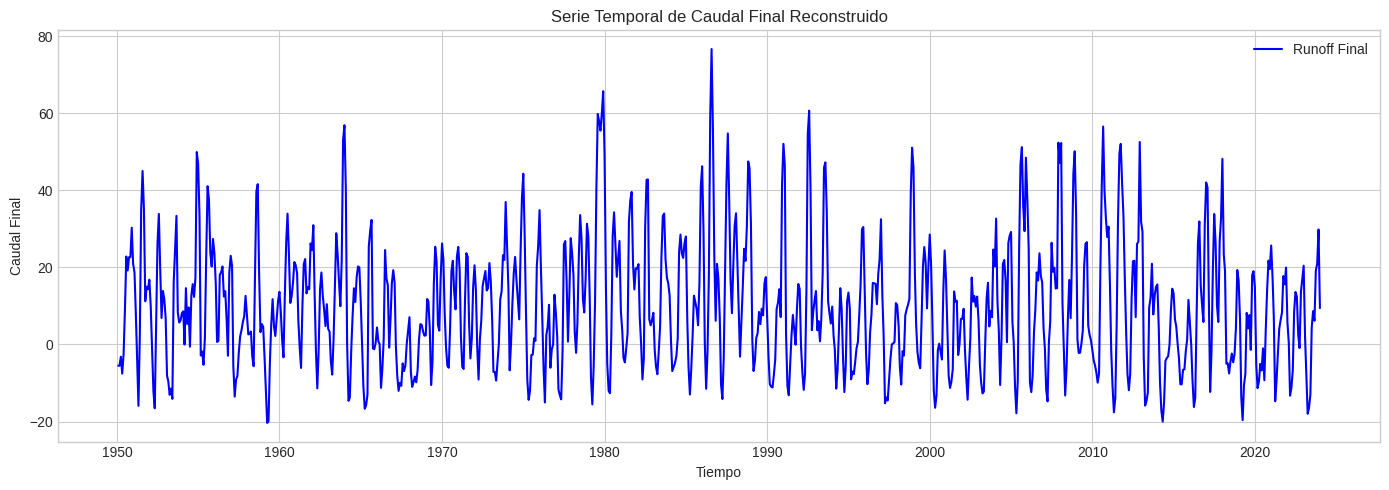

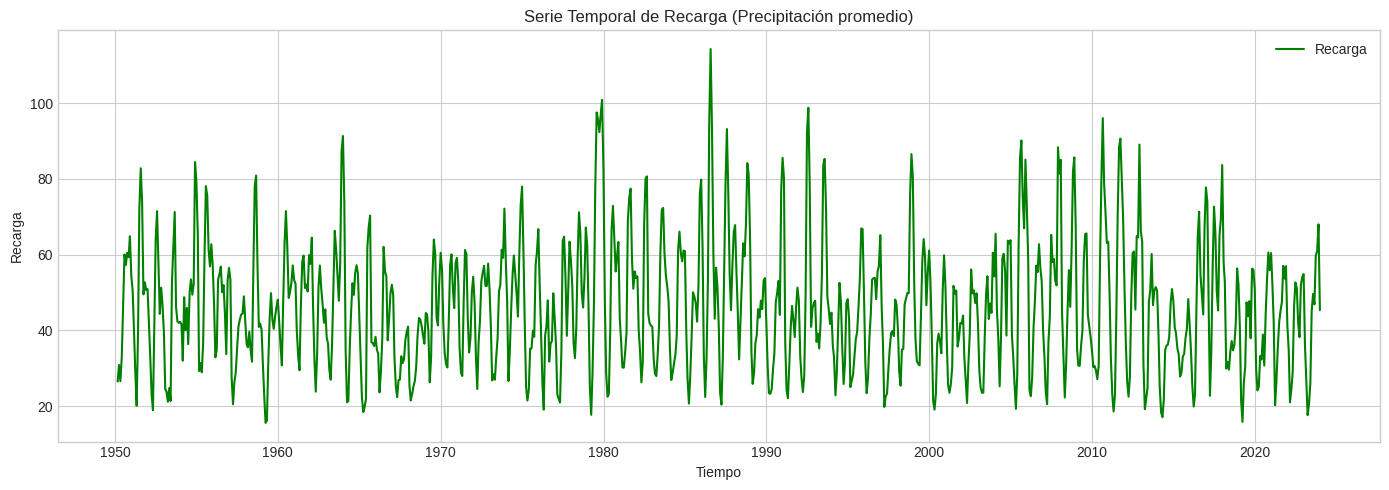

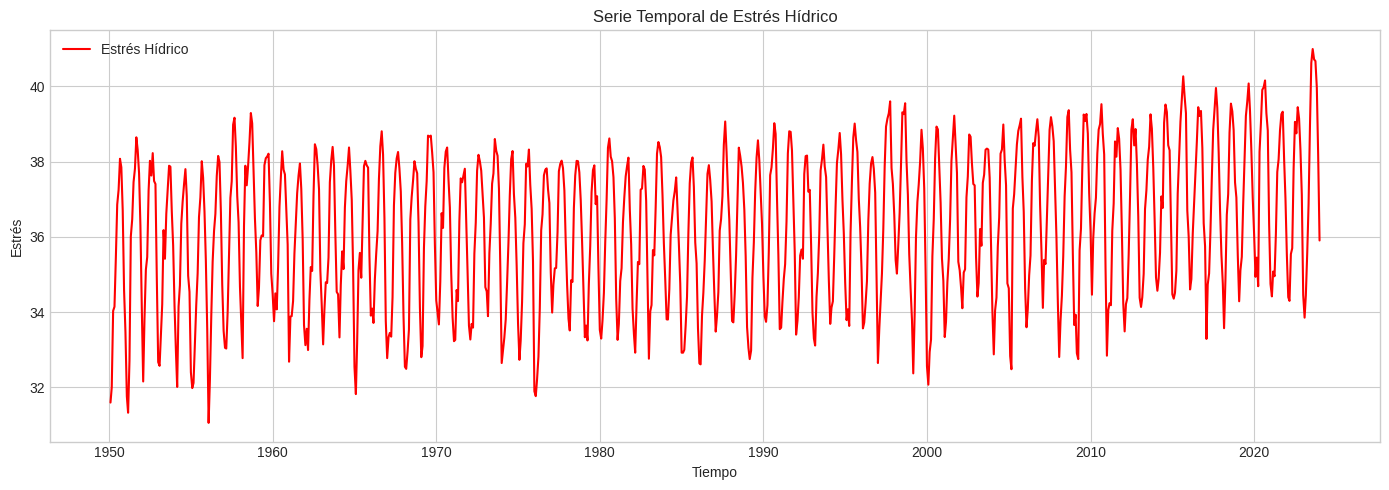

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# ===========================
# 1. Serie Temporal de Caudal Final
# ===========================
plt.figure(figsize=(14,5))
plt.plot(df_merged["time"], df_merged["runoff_final"], color="blue", label="Runoff Final")
plt.title("Serie Temporal de Caudal Final Reconstruido")
plt.xlabel("Tiempo")
plt.ylabel("Caudal Final")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===========================
# 2. Serie Temporal de Recarga
# ===========================
plt.figure(figsize=(14,5))
plt.plot(df_merged["time"], df_merged["recarga"], color="green", label="Recarga")
plt.title("Serie Temporal de Recarga (Precipitación promedio)")
plt.xlabel("Tiempo")
plt.ylabel("Recarga")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===========================
# 3. Serie Temporal de Estrés Hídrico
# ===========================
plt.figure(figsize=(14,5))
plt.plot(df_merged["time"], df_merged["estres"], color="red", label="Estrés Hídrico")
plt.title("Serie Temporal de Estrés Hídrico")
plt.xlabel("Tiempo")
plt.ylabel("Estrés")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


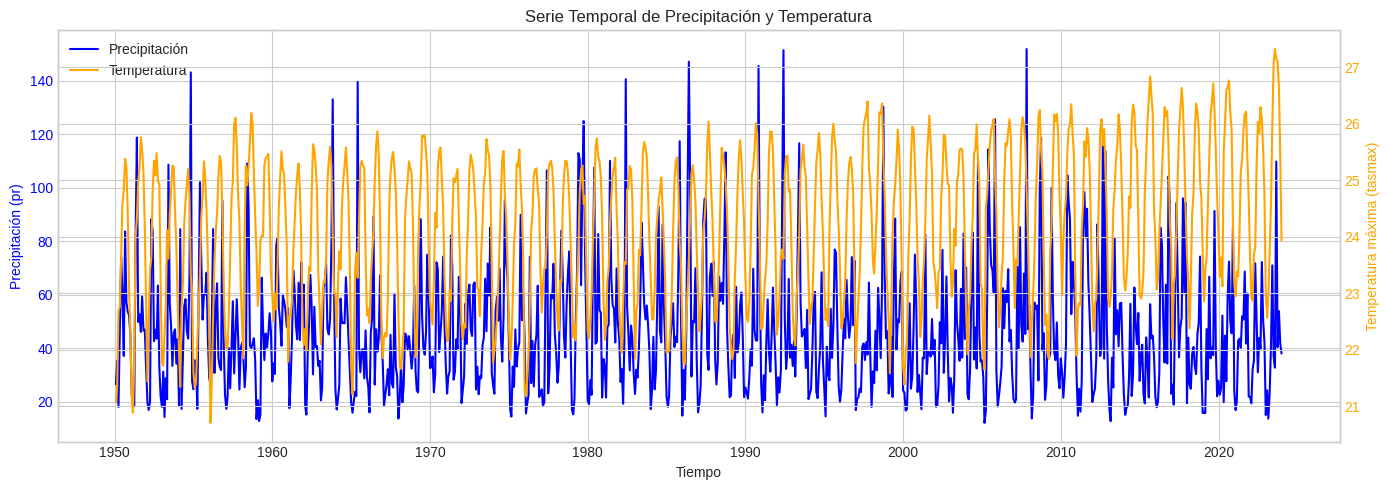

In [37]:
fig, ax1 = plt.subplots(figsize=(14,5))

ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Precipitación (pr)", color="blue")
ax1.plot(df_merged["time"], df_merged["pr"], color="blue", label="Precipitación")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temperatura máxima (tasmax)", color="orange")
ax2.plot(df_merged["time"], df_merged["tasmax"], color="orange", label="Temperatura")
ax2.tick_params(axis='y', labelcolor="orange")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Serie Temporal de Precipitación y Temperatura")
fig.tight_layout()
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
plt.show()

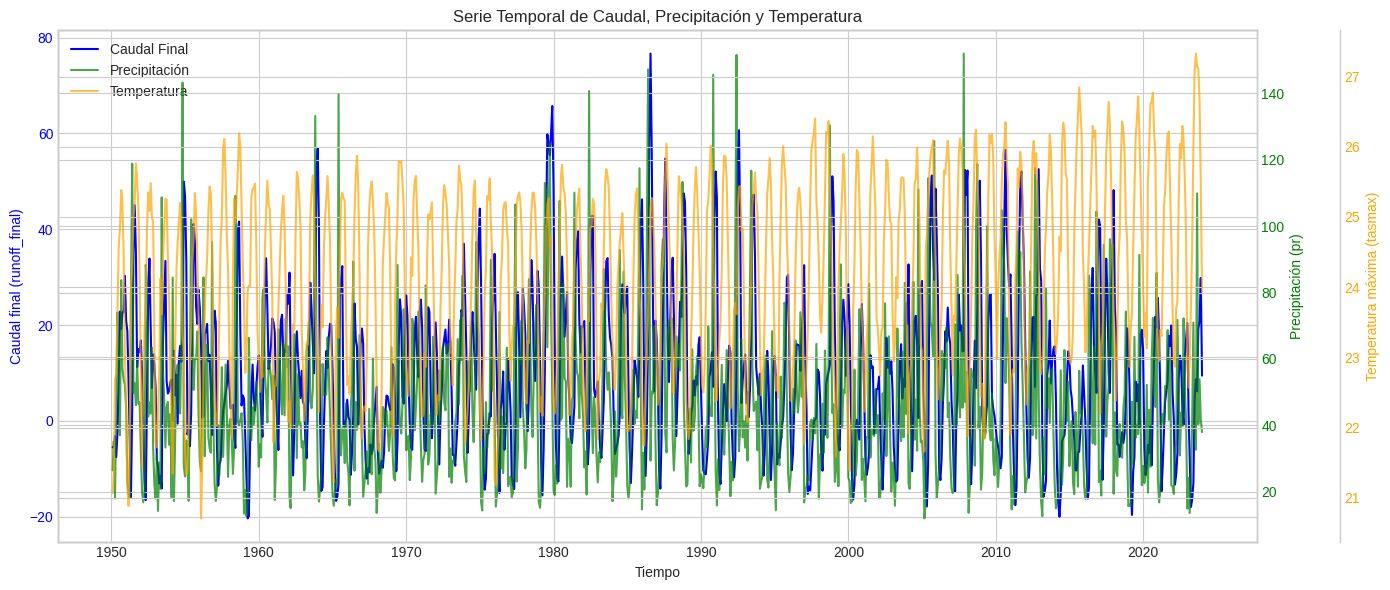

In [38]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Caudal final (runoff_final)", color="blue")
ax1.plot(df_merged["time"], df_merged["runoff_final"], color="blue", label="Caudal Final")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Precipitación (pr)", color="green")
ax2.plot(df_merged["time"], df_merged["pr"], color="green", label="Precipitación", alpha=0.7)
ax2.tick_params(axis='y', labelcolor="green")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel("Temperatura máxima (tasmax)", color="orange")
ax3.plot(df_merged["time"], df_merged["tasmax"], color="orange", label="Temperatura", alpha=0.7)
ax3.tick_params(axis='y', labelcolor="orange")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc="upper left")

plt.title("Serie Temporal de Caudal, Precipitación y Temperatura")
fig.tight_layout()
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
plt.show()


In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import os


RUTA_PRECIPITACION = "/content/rawdata/precipitation.csv"
RUTA_TEMPERATURA   = "/content/rawdata/temperatura.csv"
RUTA_GRDC          = "/content/rawdata/GRDC-Monthly.csv"

print(" Iniciando Reconstrucción de 70 Años de Historia...")

# --- 1. CARGA Y LIMPIEZA DE CLIMA (1950-2023) ---
def cargar_clima(ruta, variable):
    try:
        df = pd.read_csv(ruta, on_bad_lines='skip')
        cols = [c for c in df.columns if 'data/' in c]
        df = df.melt(id_vars=[], value_vars=cols, var_name='F', value_name=variable)
        df['Fecha'] = pd.to_datetime(df['F'].apply(lambda x: str(x).split('/')[-1]), format='%Y-%m', errors='coerce')
        return df.groupby('Fecha')[variable].mean().reset_index()
    except: return pd.DataFrame()

df_pr = cargar_clima(RUTA_PRECIPITACION, 'Precipitacion')
df_tas = cargar_clima(RUTA_TEMPERATURA, 'Temperatura')

# Unimos Clima (Base Maestra de 70 años)
df_full = pd.merge(df_pr, df_tas, on='Fecha', how='inner')
print(f" Base Climática: {len(df_full)} meses (aprox {len(df_full)/12:.1f} años).")

# --- 2. CARGA DE RÍO REAL ---
df_rio = pd.read_csv(RUTA_GRDC)
df_rio['Fecha'] = pd.to_datetime(df_rio['time'])
df_target = df_rio.groupby('Fecha')['runoff_mean'].mean().reset_index()
df_target.columns = ['Fecha', 'Caudal_Real']

# --- 3. CRUCE INTELIGENTE (LEFT JOIN) ---
df_master = pd.merge(df_full, df_target, on='Fecha', how='left')

# Variables Físicas (Inercia)
df_master['Inercia_3meses'] = df_master['Precipitacion'].rolling(3).mean()
df_master['Mes'] = df_master['Fecha'].dt.month
df_master = df_master.dropna(subset=['Inercia_3meses']) # Solo borramos los primeros 3 meses

# --- 4. ENTRENAMIENTO DE IA (Solo donde hay datos reales) ---
print("Entrenando IA para aprender la física del río...")

# Filtramos solo las filas que tienen Caudal Real para entrenar
df_train = df_master.dropna(subset=['Caudal_Real'])

X_train = df_train[['Precipitacion', 'Temperatura', 'Inercia_3meses', 'Mes']]
y_train = df_train['Caudal_Real']

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# --- 5. RECONSTRUCCIÓN HISTÓRICA (Predicción en los 70 años) ---
print("Reconstruyendo el pasado (1950-2023)...")

# Usamos el modelo para llenar la columna 'Caudal_IA' en TODO el dataset
columnas_prediccion = ['Precipitacion', 'Temperatura', 'Inercia_3meses', 'Mes']
df_master['Caudal_IA'] = modelo.predict(df_master[columnas_prediccion])

# --- 6. EXPORTAR ---
# Guardamos todo. En Streamlit graficarás:
# Línea Azul: Caudal_IA (Continua 70 años)
# Puntos Rojos: Caudal_Real (Solo donde hay datos, para validar)

nombre_archivo = 'app_data_70years.csv'
df_master.to_csv(nombre_archivo, index=False)

print(f"¡ÉXITO! Archivo '{nombre_archivo}' generado con {len(df_master)} meses.")
print("Descargando...")

try:
    files.download(nombre_archivo)
except:
    print(f"Archivo guardado en: {os.getcwd()}")

 Iniciando Reconstrucción de 70 Años de Historia...
 Base Climática: 888 meses (aprox 74.0 años).
Entrenando IA para aprender la física del río...
Reconstruyendo el pasado (1950-2023)...
¡ÉXITO! Archivo 'app_data_70years.csv' generado con 886 meses.
Descargando...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>